## INF1608 - Análise Numérica - 2016.1
## Departamento de Informática - PUC-Rio 
## Prof. Hélio Lopes - lopes@inf.puc-rio.br
## http://www.inf.puc-rio.br/~lopes



## Lista 2

1) Considerando o método de mínimos quadrados para determinarmos o polinômio de grau d que ajusta um conjunto de pontos {(x[i],y[i]), i = 0..(N-1)}, faça: 

1a) Escreva uma função buildLSmatrix que monta a matriz A de tamanho Nx(d+1) e cujos elementos A[i,j] são dados por A[i,j] = (x[i])**j. Essa função recebe como parâmetros: o vetor x e o grau d do polinomio de ajuste.

1b) Escreva uma segunda função que retorne os coeficientes do polinomio de grau d que melhor ajusta o conjunto de pontos. Essa função recebe como parâmetros: o vetor x, o vetor y e o grau do polinomio de ajuste, e retorna o vetor c
que é a solução da equação normal (At A c = At y), onde At é a matriz transposta de A.

1c) Faça uma função evalp que retorna o valor de polinomio de grau d com os coeficientes dados pelo vetor c no ponto x. Essa função retornará o seguinte valor:  c_0 + c_1 * x + ... + c[d] * x**d.

1d) Como você mediria o erro quadrático da __aproximação__ pelo método de mínimos quadrados?

1e) Considere que:
x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0] 
Qual foi o erro quadrático da aproximação por um polinômio de grau 1 ? E para um de grau 2? E um de grau 3?


[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]]
[ 11.6        -13.21428571   6.03571429  -0.75      ]
0.454153977928
3.67142857143


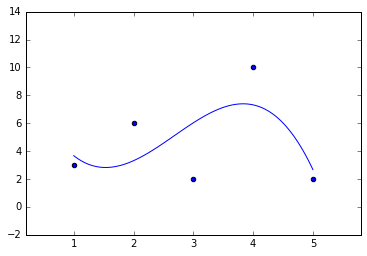

In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Início: Funções de decomposição LU com permutação ###

# Função que retorna o índice da linha com o maior pivô disponível
# de uma matriz de acordo com uma coluna.
#
# A: matriz que terá o pivô procurado
# c: índice da coluna que terá o pivô procurado
def FindMaxPivotLineIndex(A,c):
    
    maxPivot = np.absolute(A[c][c])
    maxPivotLineIndex = c
    
    n = len(A)
    for i in range(c,n):
        
        if np.absolute(A[i][c]) > maxPivot:
            maxPivot = np.absolute(A[i][c])
            maxPivotLineIndex = i        
    
    return maxPivotLineIndex

# Função que retorna uma matriz de permutação.
#
# n: dimenção da matriz quadrada
# l1: índice da primeira linha que será trocada com a segunda
# l2: índice da segunda linha que será trocada com a primeira
def BuildPermutationMatrix(n,l1,l2):
    
    P = np.identity(n)
    
    if l1 >= n or l2 >= n:
        return P
    
    P[l1][l1] = 0.0
    P[l1][l2] = 1.0
    
    P[l2][l2] = 0.0
    P[l2][l1] = 1.0
    
    return P

# Decomposição LU com permutação de linhas.
# A função retorna um vetor com duas posições, que correspondem aos segintes dados:
# índice [0]: Matriz de Permutação;
# índice [1]: Matriz da redução LU;
#
# A: matriz que será decomposta
def LUdecompWithPermutation(A):
    
    LU = np.copy(A)
    n = len(A)
    vetP = np.zeros((n-1,n,n))
    
    for j in range(n-1):
        
        pivotLineIndex = FindMaxPivotLineIndex(LU,j)
        auxP = BuildPermutationMatrix(n,j,pivotLineIndex)
        LU = np.dot(auxP,LU)
        vetP[j] = auxP
        
        for i in range(j+1,n):            
            LU[i][j] = LU[i][j]/LU[j][j]
            for k in range(j+1,n):
                LU[i][k] = LU[i][k] - LU[i][j]*LU[j][k]

    P = reduce(np.dot, vetP[::-1])
    return np.array((P,LU))

### Questão Número 2 ###
def LUforwardsub (L,b):
    n = len(L)
    y = np.zeros(n)
    y[0] = b[0]
    for i in range(1,n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - L[i][j]*y[j]
    return y
            
def LUbackwardsub (U,y):
    n = len(U)
    x = np.zeros(n)
    x[n-1] = y[n-1]/U[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] = x[i] - U[i][j]*x[j]
        x[i] /= U[i][i]
    return x

# Solução de um sistema de equações lineares com permutação de linhas.
#
# P: matriz de permutação das linhas
# LU: matriz de decomposição LU
# b: vetor b do sistema (Ax = b)
def LUsolveWithPermutation(P,LU,b):
    b = np.dot(P,b)
    y = LUforwardsub(LU,b)
    x = LUbackwardsub(LU,y)
    return x

### Fim: Funções de decomposição LU com permutação ###

def evalp(x,c):
    
    valP = 0.0
    
    for i in range(len(c)):
        
        valP += c[i]*(x**i)
        
    return valP

def buildLSmatrix(x,d):
    
    n = len(x)
    A = np.zeros((n,d+1))
    
    for i in range(n):
        for j in range(d+1):
            
            A[i][j] = x[i]**(j)
    
    return A

def LeastSquares(x,y,d):
    
    A = buildLSmatrix(x,d)
    At = np.transpose(A)
    
    At_mult_A = np.dot(At,A)
    At_mult_y = np.dot(At,y)
    
    PAndLU = LUdecompWithPermutation(At_mult_A)
    c = LUsolveWithPermutation(PAndLU[0],PAndLU[1],At_mult_y)
    
    return c

def drawLSpolynomial(x,y,c,N,xmin,xmax):
    delta = (xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta
        px[i] = xp
        py[i] = evalp(xp,c)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-0.2*deltax, xmax+0.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0]
d = 3

A = buildLSmatrix(x,d)
print(A)

c = LeastSquares(x,y,d)
print(c)

erro = np.linalg.norm(A.dot(c)-y)/np.linalg.norm(y)
print(erro)

v = evalp(1.0,c)
print(v)

drawLSpolynomial(x,y,c,100,min(x),max(x))



2) Façam a leitura e alguns exercícios do capítulo de Autovalores e Autovetores do livro do Anton-Rorres.



Avançando um pouco mais...leia com atenção os seguintes resultados:

__TEOREMA ESPECTRAL__: Considere uma matriz real A simétrica (At = A) de tamanho nxn.  Então existe uma base ortonormal de $R^n$ formada pelos autovetores de A. 

__TEOREMA__: Se A é uma matriz real e simétrica, então os autovalores de A serão todos números reais.

__TEOREMA__: Se A é uma matriz real e simétrica, então os autovetores $v_1$ e $v_2$ associados a autovalores distintos de A são ortogonais entre si.

3) Mostre que se $v$ é um autovetor associado ao autovalor $\lambda$ de A e A é inversível, então $v$ é um autovetor associado ao autovalor $1/lambda$ da matriz inversa de A.

4) Mostre que se $v$ é um autovetor associado ao autovalor $\lambda$ de A, então $v$ é um autovetor associado ao autovalor $0$ da matriz B = A - $\frac{\lambda}{v^tv}$ $vv^t$.

5) Assumindo que A é uma matriz real simétrica que possui n autovalores distintos, utilize o resultado do exercício 3 e o método da potência para construir um novo método que computa todos os autovalores de A. (Esse método é chamado de método da deflação). O método da potência está implementado abaixo:

In [22]:
import numpy as np

def innerprod(u,v):
    n = len(u)
    res = 0.0
    for i in range(n):
        res += u[i]*v[i]
    return res

def prod(A,x):
    n = len(A) 
    res = np.copy(x)
    for i in range(n):
        res[i] = 0.0
        for j in range(n):
            res[i] += A[i,j]*x[j]
    return res

def normalize(v):
    w = np.zeros(len(v))
    norma = np.linalg.norm(v)
    if (norma == 0.0):
        return w
    for i in range(len(v)):
        w[i] = v[i]/norma
    return w

def powermethod(A,v,maxiter,eps):
    x0 = normalize(v) 
    n  = len(A)
    for i in range(maxiter):
        x1 = prod(A,x0)
        x1 = normalize(x1)
        erro = np.linalg.norm(x1-x0)
        if (erro < eps):
            print(i)
            break
        x0 = np.copy(x1)
    x1 = prod(A,x0)
    lambda1 = innerprod(x1,x0)
    return lambda1,x0

A = np.matrix([[1.0,2.0],[2.0,1.0]])
v = np.array([2.0,0.0])

l1,x1 = powermethod(A,v,100,0.0000000001)

print(l1)
print(x1)

22
3.0
[ 0.70710678  0.70710678]


6) A função np.linalg.eig(A) retorna todos os autovalores e autovetores da matriz A. Utilizando essa função determine a direção de maior variação dos dados e a de menor variação dos dados da tabela:


In [58]:
import numpy as np

def padroniza(T):
    m = np.shape(T)[0]
    n = np.shape(T)[1]
    TP = np.copy(T)
    Media = np.zeros(n)
    for j in range(n):
        Media[j] = 0.0
        for i in range(m):
            Media[j] += T[i,j]
        Media[j] /= m
    Variancia = np.zeros(n)
    for j in range(n):
        Variancia[j] = 0.0
        for i in range(m):
            Variancia[j] += (T[i,j]-Media[j])**2
        Variancia[j] /= (m-1)
    for j in range(n):
        for i in range(m):
            TP[i,j] = (T[i,j]-Media[j])/np.sqrt(Variancia[j])
    return TP

T = np.genfromtxt('protein.txt', delimiter=',')
print(T)

TP = padroniza(T)

SIGMA = np.cov(TP)
print(np.shape(SIGMA))

Eigen = np.linalg.eigh(SIGMA)
print(Eigen[0])


[[ 10.1   1.4   0.5   8.9   0.2  42.3   0.6   5.5   1.7]
 [  8.9  14.    4.3  19.9   2.1  28.    3.6   1.3   4.3]
 [ 13.5   9.3   4.1  17.5   4.5  26.6   5.7   2.1   4. ]
 [  7.8   6.    1.6   8.3   1.2  56.7   1.1   3.7   4.2]
 [  9.7  11.4   2.8  12.5   2.   34.3   5.    1.1   4. ]
 [ 10.6  10.8   3.7  25.    9.9  21.9   4.8   0.7   2.4]
 [  8.4  11.6   3.7  11.1   5.4  24.6   6.5   0.8   3.6]
 [  9.5   4.9   2.7  33.7   5.8  26.3   5.1   1.    1.4]
 [ 18.    9.9   3.3  19.5   5.7  28.1   4.8   2.4   6.5]
 [ 10.2   3.    2.8  17.6   5.9  41.7   2.2   7.8   6.5]
 [  5.3  12.4   2.9   9.7   0.3  40.1   4.    5.4   4.2]
 [ 13.9  10.    4.7  25.8   2.2  24.    6.2   1.6   2.9]
 [  9.    5.1   2.9  13.7   3.4  36.8   2.1   4.3   6.7]
 [  9.5  13.6   3.6  23.4   2.5  22.4   4.2   1.8   3.7]
 [  9.4   4.7   2.7  23.3   9.7  23.    4.6   1.6   2.7]
 [  6.9  10.2   2.7  19.3   3.   36.1   5.9   2.    6.6]
 [  6.2   3.7   1.1   4.9  14.2  27.    5.9   4.7   7.9]
 [  6.2   6.3   1.5  11.1   1. 